### HR - Attrition Analytics -  Exploratory Analysis & Predictive Modeling
> Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire <br>
> and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources.  <br>
> So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition  <br>
> risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the  <br>
> impact to the orgranization.

### DATA ATRRIBUTES

satisfaction_level: Employee satisfaction level <br>
last_evaluation: Last evaluation  <br>
number_project: Number of projects  <br>
average_montly_hours: Average monthly hours <br>
time_spend_company: Time spent at the company <br>
Work_accident: Whether they have had a work accident <br>
promotion_last_5years: Whether they have had a promotion in the last 5 years <br>
department: Department <br>
salary: Salary <br>
left: Whether the employee has left <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import metrics

### UDF's

In [3]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [4]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [5]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    return x

In [6]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

### data import and inspection 

In [7]:
# Load the data
hr_df = pd.read_csv('D:/SampleData/HR_attrition_data.csv' )

In [8]:
# list all columns
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
# meta data
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
hr_df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
department                10
salary                     3
dtype: int64

In [12]:
hr_df.select_dtypes(['int64', 'float64']).apply(continuous_var_summary)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
N,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000,14999.000000,14999.000000,14999.000000
NMISS,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
SUM,9191.890000,10740.810000,57042.000000,3.015554e+06,52470.000000,2169.000000,3571.000000,319.000000
MEAN,0.612834,0.716102,3.803054,2.010503e+02,3.498233,0.144610,0.238083,0.021268
MEDIAN,0.640000,0.720000,4.000000,2.000000e+02,3.000000,0.000000,0.000000,0.000000
STD,0.248631,0.171169,1.232592,4.994310e+01,1.460136,0.351719,0.425924,0.144281
VAR,0.061817,0.029299,1.519284,2.494313e+03,2.131998,0.123706,0.181411,0.020817
MIN,0.090000,0.360000,2.000000,9.600000e+01,2.000000,0.000000,0.000000,0.000000
P1,0.090000,0.390000,2.000000,1.040000e+02,2.000000,0.000000,0.000000,0.000000
P5,0.110000,0.460000,2.000000,1.300000e+02,2.000000,0.000000,0.000000,0.000000


The summary statistics for Work_accident, left and promotion_last_5years does not make sense, as they are categorical variables

### PREDICTIVE MODEL: Build a model to predict if an employee will leave the company
> dependant variable is **left**

In [13]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

categorical_features = ['Work_accident', 'promotion_last_5years', 'department', 'salary']

In [14]:
for c_feature in categorical_features:
    hr_df = create_dummies(hr_df, c_feature )

In [15]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [16]:
# get all the feature variables
feature_columns = hr_df.columns.difference( ['left'] )

In [17]:
feature_columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [18]:
hr_df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [19]:
hr_df.left.value_counts() / hr_df.shape[0]

0    0.761917
1    0.238083
Name: left, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


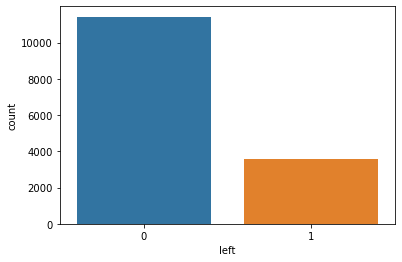

In [20]:
sns.countplot(hr_df.left)
plt.show()

### data split for training and testing

In [21]:
# import the package
from sklearn.model_selection import train_test_split

# get training and testing datasets
train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns], 
                                                        hr_df['left'], 
                                                        test_size = 0.3,
                                                        random_state = 123)

### build logistic regression model

use TAB key to get the suggestions

In [91]:
# Building Models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, roc_curve

In [25]:
# define the model equation and fit the model on train data
logreg = LogisticRegression( max_iter = 1000 ).fit( train_X, train_y )

In [40]:
# get the coefficients for reference
pd.DataFrame( index = pd.Series(feature_columns), data = logreg.coef_[0], columns = ['coefficient'] )

,coefficient
Work_accident_1,-1.538426
average_montly_hours,0.004431
department_RandD,-0.418887
department_accounting,0.195707
department_hr,0.393217
department_management,-0.419549
department_marketing,0.148511
department_product_mng,-0.042715
department_sales,0.124996
department_support,0.164691


In [41]:
# get the value of intercept
logreg.intercept_[0]

-1.666320184228273

In [34]:
# predict the output probabilities
y_train_pred_proba = logreg.predict_proba( train_X )[:, 1]
y_test_pred_proba = logreg.predict_proba( test_X )[:, 1]

In [35]:
# scoring of the model, roc_auc_score
print( 'train data: ', roc_auc_score( train_y, y_train_pred_proba ) )
print( 'train data: ', roc_auc_score( test_y, y_test_pred_proba ) )

train data:  0.822817152144018
train data:  0.8197044541545596


In [43]:
# accuracy at defulat 0.5 cutoff
print( 'train data: ', accuracy_score( train_y, logreg.predict( train_X ) ) )
print( 'train data: ', accuracy_score( test_y, logreg.predict( test_X ) ) )

train data:  0.7887417849318983
train data:  0.7897777777777778


In [68]:
# confusion matrix - at defulat 0.5 cutoff - train
confusion_matrix( train_y, logreg.predict( train_X ) )[::-1, ::-1]

array([[ 865, 1635],
       [ 583, 7416]], dtype=int64)

In [60]:
# confusion matrix - at defulat 0.5 cutoff - test
confusion_matrix( test_y, logreg.predict( test_X ) )[::-1, ::-1]

array([[ 349,  722],
       [ 224, 3205]], dtype=int64)

In [54]:
# classification report - at defulat 0.5 cutoff
print( classification_report( train_y, logreg.predict( train_X ) ) )
print('\n')
print( classification_report( test_y, logreg.predict( test_X ) ) )

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      7999
           1       0.60      0.35      0.44      2500

    accuracy                           0.79     10499
   macro avg       0.71      0.64      0.65     10499
weighted avg       0.77      0.79      0.77     10499



              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3429
           1       0.61      0.33      0.42      1071

    accuracy                           0.79      4500
   macro avg       0.71      0.63      0.65      4500
weighted avg       0.77      0.79      0.77      4500



#### get the best cutoff

1. for loop to get the best cutoff where we have max of Senstivity + Specificity
2. chart - distribution plot
3. chart - roc_aur_curve


#### Estimate the best cutoffs - Method 1 (for loop)

In [69]:
# declare empty dataframe
cm_scores = pd.DataFrame()

for iCutoff in np.arange(0, 1, 0.005):
    
    # do the predictions at the cutoff
    y_predict = np.where( y_train_pred_proba >= iCutoff, 1, 0 )
    
    # create the confusion matrix with predicted y
    cm = metrics.confusion_matrix( train_y, y_predict )[::-1, ::-1]
    
    # get the sentivity + specificity at the cutoff
    Total = cm[0, 0]/cm.sum(axis = 1)[0] + cm[1, 1]/cm.sum(axis = 1)[1]
    
    # append the data row wise in the dataframe
    cm_scores = pd.concat( [cm_scores, pd.DataFrame([iCutoff, Total]).T ], axis = 0 )
    
cm_scores.columns = ['Cutoff', 'Score']
cm_scores.loc[ cm_scores.Score == cm_scores.Score.max(), 'Cutoff']

0    0.25
Name: Cutoff, dtype: float64

#### Estimate the best cutoffs - Method 2

In [83]:
hr_train_pred = pd.concat( [train_y.reset_index( drop = True ), 
                            pd.Series( y_train_pred_proba, name = 'predict_proba' ) ], axis = 1 )

hr_test_pred = pd.concat( [test_y.reset_index( drop = True ), 
                            pd.Series( y_test_pred_proba, name = 'predict_proba' ) ], axis = 1 )

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


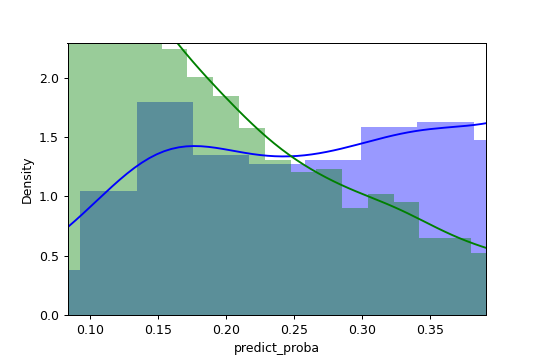

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [93]:
%matplotlib notebook
sns.distplot( hr_train_pred.loc[ hr_train_pred.left == 1 ,  'predict_proba'], color = 'b' )
sns.distplot( hr_train_pred.loc[ hr_train_pred.left == 0 ,  'predict_proba'], color = 'g' )
plt.show()

#### ROC curve - Method 3

In [94]:
roc_curve?

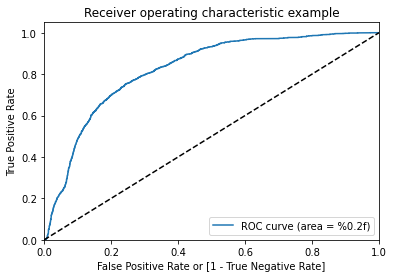

In [95]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = roc_curve( hr_train_pred.left, 
                                             hr_train_pred.predict_proba,
                                                 drop_intermediate = False )

%matplotlib inline
plt.figure(figsize = (6, 4))
plt.plot( fpr, tpr, label = 'ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

In [107]:
roc_auc_data = pd.DataFrame( [fpr, tpr, thresholds] ).T
roc_auc_data.columns = ['fpr', 'tpr', 'thresholds']
roc_auc_data.head(2)

,fpr,tpr,thresholds
0,0.000000,0.0,1.910601
1,0.000125,0.0,0.910601


In [ ]:
# get the threshold value for min of the calculation in next cell
??

In [112]:
min(abs(roc_auc_data.fpr - 0.2))

2.5003125390665737e-05

In [44]:
# predict the values for training
logreg.predict(train_X) # by default, it use cut-off as 0.5

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [45]:
# Predicting on the training data
hr_train_pred = pd.DataFrame(train_y)
hr_train_pred['predicted'] = logreg.predict(train_X) # based of cut off of 0.5

In [46]:
# Comparing the predictions with actual train data
hr_train_pred.head()

,left,predicted
5242,0,0
12674,1,0
6924,0,1
12595,1,1
13482,0,0


In [47]:
# Predicting on the test data
hr_test_pred = pd.DataFrame(test_y)
hr_test_pred['predicted'] = logreg.predict(test_X)

In [48]:
# Comparing the predictions with actual test data
hr_test_pred.head()

,left,predicted
6958,0,0
7534,0,0
2975,0,0
3903,0,0
8437,0,0


In [49]:
# Creating a confusion matrix
cm_lr = metrics.confusion_matrix( hr_test_pred.left, hr_test_pred.predicted )[::-1, ::-1]

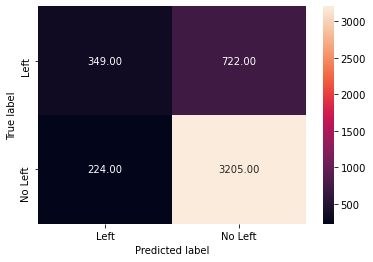

In [50]:
sns.heatmap(cm_lr, annot = True,  fmt = '.2f', 
                xticklabels = ["Left", "No Left"], 
                    yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [51]:
# classification report
print(metrics.classification_report(hr_test_pred.left, hr_test_pred.predicted))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3429
           1       0.61      0.33      0.42      1071

    accuracy                           0.79      4500
   macro avg       0.71      0.63      0.65      4500
weighted avg       0.77      0.79      0.77      4500



In [ ]:
# get train and test accuracy score
print('Train Accuracy: ', metrics.accuracy_score(hr_train_pred.left, hr_train_pred.predicted).round(4))
print('Test Accuracy: ', metrics.accuracy_score(hr_test_pred.left, hr_test_pred.predicted).round(4))

Overall test accuracy is 79%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left. <br>
The objective of the model is to indentify the people who will leave, so that the company can intervene and act.<br>
This might be the case as the default model assumes people with more than 0.5 probability will not leave the company

In [ ]:
hr_train_pred = hr_train_pred.reset_index( drop = True )
hr_test_pred = hr_test_pred.reset_index( drop = True )

In [ ]:
# How good the model is?
hr_train_pred['predict_proba'] = pd.Series(logreg.predict_proba(train_X)[:, 1])
hr_test_pred['predict_proba'] = pd.Series(logreg.predict_proba(test_X)[:, 1])

In [ ]:
# get train and test auc score
print('Train AUC: ', metrics.roc_auc_score(hr_train_pred.left, hr_train_pred.predict_proba).round(4))
print('Test AUC: ', metrics.roc_auc_score(hr_test_pred.left, hr_test_pred.predict_proba).round(4))

In [ ]:
 metrics.confusion_matrix( hr_train_pred.left, logreg.predict( train_X ) )[::-1, ::-1]

In [ ]:
# get the exact cutoff value
roc_auc_table = pd.concat([pd.Series(fpr), pd.Series(tpr), pd.Series(thresholds)], axis = 1)
roc_auc_table.columns = ['fpr', 'tpr', 'threshold']
roc_auc_table['total'] = roc_auc_table.tpr + 1 - roc_auc_table.fpr

roc_auc_table[roc_auc_table.total == roc_auc_table.total.max()]

In [ ]:
roc_auc_table.to_csv('ROC.csv')

In [ ]:
# Predicting with new cut-off probability
hr_train_pred['new_predicted'] = hr_train_pred.predict_proba.map( lambda x: 1 if x >= 0.25 else 0 )

In [ ]:
# Predicting with new cut-off probability
hr_test_pred['new_predicted'] = hr_test_pred.predict_proba.map( lambda x: 1 if x >= 0.25 else 0 )

In [ ]:
cm_lr_1 = metrics.confusion_matrix(hr_test_pred.left, hr_test_pred.new_predicted)[::-1, ::-1]
cm_lr_1

In [ ]:
%matplotlib inline
sns.heatmap(cm_lr_1, annot = True,  fmt = '.2f', 
                xticklabels = ["Left", "No Left"], 
                    yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# get train and test accuracy score
print('Train Accuracy: ', metrics.accuracy_score(hr_train_pred.left, hr_train_pred.new_predicted).round(4))
print('Test Accuracy: ', metrics.accuracy_score(hr_test_pred.left, hr_test_pred.new_predicted).round(4))

In [ ]:
# classification report
print(metrics.classification_report(hr_test_pred.left, hr_test_pred.new_predicted))

### Building Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#### Fine Tuning the parameters

In [ ]:
param_grid = { 'max_depth': range(7, 13),
                 'min_samples_leaf': range(1, 10)}

In [ ]:
tree = GridSearchCV( DecisionTreeClassifier( random_state = 1 ), 
                        param_grid, 
                        cv = 10, 
                        scoring = 'roc_auc', 
                        verbose = True, 
                        n_jobs = -1 ).fit( train_X, train_y )

In [ ]:
# get the best score and parameters
print('Best score: ', tree.best_score_)
print('Best parameters: ', tree.best_params_)

In [ ]:
# build the decision tree model with the best parameter combinations
clf_tree = DecisionTreeClassifier( max_depth = 9, min_samples_leaf = 7 ).fit( train_X, train_y )

In [ ]:
# get the best estimator
tree.best_estimator_

In [ ]:
# get the probability score on training and testing
train_predict_prob = pd.DataFrame(clf_tree.predict_proba(train_X))[1]
test_predict_prob = pd.DataFrame(clf_tree.predict_proba(test_X))[1]

In [ ]:
# get the model auc after parameter tuning
print(metrics.roc_auc_score(train_y, train_predict_prob))
print(metrics.roc_auc_score(test_y, test_predict_prob))

In [ ]:
# get the model accuracy
print(metrics.accuracy_score(train_y, clf_tree.predict(train_X)))
print(metrics.accuracy_score(test_y, clf_tree.predict(test_X)))

In [ ]:
# confusion metrix for test data
tree_cm_tree = metrics.confusion_matrix(test_y, clf_tree.predict(test_X))[::-1, ::-1]
sns.heatmap(tree_cm_tree, annot = True, fmt = '.2f',
                xticklabels = ["Left", "No Left"] , 
                    yticklabels = ["Left", "No Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
hr_train_pred = pd.concat( [train_y.reset_index( drop = True), 
                                pd.Series( clf_tree.predict_proba( train_X )[:, 1]) ], axis = 1)
hr_train_pred.columns = ['left', 'predict_proba']

In [ ]:
hr_test_pred = pd.concat( [test_y.reset_index( drop = True), 
                                pd.Series( clf_tree.predict_proba( test_X )[:, 1]) ], axis = 1)
hr_test_pred.columns = ['left', 'predict_proba']

#### Estimate the best cutoffs - Method 1 (for loop)

In [ ]:
# declare empty dataframe
cm_scores = pd.DataFrame()

for iCutoff in np.arange(0, 1, 0.005):
    
    # do the predictions at the cutoff
    y_predict = np.where( hr_train_pred.predict_proba >= iCutoff, 1, 0 )
    
    # create the confusion matrix with predicted y
    cm = metrics.confusion_matrix( hr_train_pred.left, y_predict )[::-1, ::-1]
    
    # get the sentivity + specificity at the cutoff
    Total = cm[0, 0]/cm.sum(axis = 1)[0] + cm[1, 1]/cm.sum(axis = 1)[1]
    
    # append the data row wise in the dataframe
    cm_scores = pd.concat( [cm_scores, pd.DataFrame([iCutoff, Total]).T ], axis = 0 )
    
cm_scores.columns = ['Cutoff', 'Score']
cm_scores.loc[ cm_scores.Score == cm_scores.Score.max(), 'Cutoff'].iloc[0]

In [ ]:
y_predict = np.where(hr_test_pred.predict_proba >= 0.22, 1, 0)

In [ ]:
tree_cm_tree = metrics.confusion_matrix(test_y, y_predict )[::-1, ::-1]

In [ ]:
# confusion metrix for test data
sns.heatmap(tree_cm_tree, annot = True, fmt = '.2f',
                xticklabels = ["Left", "No Left"] , 
                    yticklabels = ["Left", "No Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# accuracy score
metrics.accuracy_score(test_y, y_predict)

---
# Model $Ensembles$


> Ensemble methods combine multiple classifiers (using _model averaging_ or _voting_) which may differ in algorithms, input features, or input samples. Statistical analyses showed that ensemble methods yield better classification performances and are also less prone to overfitting. Different methods, e.g., bagging or boosting, are used to construct the final classification decision based on weighted votes.

## What is ensembling?

**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model.

- **Regression:** take the average of the predictions
- **Classification:** take a vote and use the most common prediction, or take the average of the predicted probabilities

For ensembling to work well, the models must have the following characteristics:

- **Accurate:** they outperform the null model
- **Independent:** their predictions are generated using different processes

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models.

There are two basic **methods for ensembling:**

- Manually ensemble your individual models
- Use a model that ensembles for you

---
Why are we learning about ensembling?

- Very popular method for improving the predictive performance of machine learning models

- Provides a foundation for understanding more sophisticated models

---
# Manual ensembling

What makes a good manual ensemble?

- Different types of **models**
    - Ex. Build an SVC, Decision Tree and a kNN
- Different combinations of **features**
    - Ex. Take a random selection of 5 variables for each model
- Different **tuning parameters**
    - Ex. From the grid search take the top 5 or ten best performing models 

In [ ]:
from IPython.display import Image
Image(filename='crowdflower_ensembling.jpg')

## Comparing manual ensembling with a single model approach

**Advantages of manual ensembling:**

- Increases predictive accuracy
- Easy to get started

**Disadvantages of manual ensembling:**

- Decreases interpretability
- Takes longer to train
- Takes longer to predict
- More complex to automate and maintain
- Small gains in accuracy may not be worth the added complexity

<big>

---

- Decision Trees are a 
    - LOW BIAS (not prone to underfitting), 
    - HIGH VARIANCE (prone to overfitting) algorithm


- ENSEMBLES are a variance reduction technique

- ENSEMBLES OF DECISION TREES create LOW BIAS, LOW VARIANCE model.

---

# Bagging

The primary weakness of **decision trees** is that they don't tend to have the best predictive accuracy. This is partially due to **high variance**, meaning that different splits in the training data can lead to very different trees.

**Bagging** is a general purpose procedure for reducing the variance of a machine learning method, but is particularly useful for decision trees. Bagging is short for **bootstrap aggregation**, meaning the aggregation of bootstrap samples.

What is a **bootstrap sample**? A random sample with replacement:

---
**How does bagging work (for decision trees)?**

1. Grow B trees using B bootstrap samples from the training data.
2. Train each tree on its bootstrap sample and make predictions.
3. Combine the predictions:
    - Average the predictions for **regression trees**
    - Take a vote for **classification trees**

Notes:

- **Each bootstrap sample** should be the same size as the original training set.
- **B** should be a large enough value that the error seems to have "stabilized".
- The trees are **grown deep** so that they have low bias/high variance.

Bagging increases predictive accuracy by **reducing the variance**, similar to how cross-validation reduces the variance associated with train/test split (for estimating out-of-sample error) by splitting many times an averaging the results.

In [ ]:
import sklearn.ensemble as en

In [ ]:
print([x for x in dir(en) if not x.startswith('_')])

### Bagged decision trees

In [ ]:
from sklearn.ensemble import BaggingClassifier

----
## Estimating out-of-sample error

For bagged models, out-of-sample error can be estimated without using **train/test split** or **cross-validation**!

On average, each bagged tree uses about **two-thirds** of the observations. For each tree, the **remaining observations** are called "out-of-bag" observations.

How to calculate **"out-of-bag error":**

1. For every observation in the training data, predict its response value using **only** the trees in which that observation was out-of-bag. Average those predictions (for regression) or take a vote (for classification).
2. Compare all predictions to the actual response values in order to compute the out-of-bag error.

When B is sufficiently large, the **out-of-bag error** is an accurate estimate of **out-of-sample error**.

In [ ]:
pargrid_bagging = {'n_estimators': [230, 250, 270, 290]}

gscv_bagging = GridSearchCV( estimator = BaggingClassifier( oob_score = True, max_samples = 0.8, random_state = 5), 
                                param_grid = pargrid_bagging, 
                                cv = 10,
                                scoring = 'roc_auc',
                                verbose = 2, 
                                n_jobs = -1).fit(train_X, train_y)

In [ ]:
gscv_bagging.best_score_

In [ ]:
gscv_bagging.best_params_

In [ ]:
metrics.accuracy_score( train_y, gscv_bagging.best_estimator_.predict( train_X ) )

In [ ]:
metrics.accuracy_score( test_y, gscv_bagging.best_estimator_.predict( test_X ) )

In [ ]:
print(metrics.classification_report( test_y, gscv_bagging.best_estimator_.predict( test_X ) ))

## Estimating feature importance

Bagging increases **predictive accuracy**, but decreases **model interpretability** because it's no longer possible to visualize the tree to understand the importance of each feature.

However, we can still obtain an overall summary of **feature importance** from bagged models:

- **Bagged regression trees:** calculate the total amount that **MSE** is decreased due to splits over a given feature, averaged over all trees
- **Bagged classification trees:** calculate the total amount that **Gini index** is decreased due to splits over a given feature, averaged over all trees

# BUILDING RANDOM FOREST MODEL

Random Forests is a **slight variation of bagged trees** that has even better performance:

- Exactly like bagging, we create an ensemble of decision trees using bootstrapped samples of the training set.
- However, when building each tree, each time a split is considered, a **random sample of m features** is chosen as split candidates from the **full set of p features**. The split is only allowed to use **one of those m features**.
    - A new random sample of features is chosen for **every single tree at every single split**.
    - For **classification**, m is typically chosen to be the square root of p.
    - For **regression**, m is typically chosen to be somewhere between p/3 and p.

What's the point?

- Suppose there is **one very strong feature** in the data set. When using bagged trees, most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are **highly correlated**.
- Averaging highly correlated quantities does not significantly reduce variance (which is the entire goal of bagging).
- By randomly leaving out candidate features from each split, **Random Forests "decorrelates" the trees**, such that the averaging process can reduce the variance of the resulting model.

### Tuning n_estimators

One important tuning parameter is **n_estimators**, which is the number of trees that should be grown. It should be a large enough value that the error seems to have "stabilized".

### Tuning max_features

The other important tuning parameter is **max_features**, which is the number of features that should be considered at each split.

## Comparing Random Forests with decision trees

**Advantages of Random Forests:**

- Performance is competitive with the best supervised learning methods
- Provides a more reliable estimate of feature importance
- Allows you to estimate out-of-sample error without using train/test split or cross-validation

**Disadvantages of Random Forests:**

- Less interpretable
- Slower to train
- Slower to predict

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pargrid_rf = { 'n_estimators': [75, 90, 100, 120],
                  'max_features': [6, 7, 8, 9] }

gscv_rf = GridSearchCV(estimator = RandomForestClassifier( random_state = 5 ), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        verbose = 10, 
                        scoring = 'roc_auc',
                        n_jobs = -1 ).fit(train_X, train_y)

In [ ]:
gscv_rf.best_params_

In [ ]:
gscv_rf.best_score_

In [ ]:
metrics.roc_auc_score( train_y, gscv_rf.best_estimator_.predict_proba(train_X)[:, 1] )

In [ ]:
metrics.roc_auc_score( test_y, gscv_rf.best_estimator_.predict_proba(test_X)[:, 1] )

In [ ]:
y_train_predicted_proba = gscv_rf.best_estimator_.predict_proba(train_X)[:, 1]
y_test_predicted_proba = gscv_rf.best_estimator_.predict_proba(test_X)[:, 1]

In [ ]:
# declare empty dataframe
cm_scores = pd.DataFrame()

for iCutoff in np.arange(0, 1, 0.005):
    
    # do the predictions at the cutoff
    y_predict = np.where( y_train_predicted_proba >= iCutoff, 1, 0 )
    
    # create the confusion matrix with predicted y
    cm = metrics.confusion_matrix( train_y, y_predict )[::-1, ::-1]
    
    # get the sentivity + specificity at the cutoff
    Total = cm[0, 0]/cm.sum(axis = 1)[0] + cm[1, 1]/cm.sum(axis = 1)[1]
    
    # append the data row wise in the dataframe
    cm_scores = pd.concat( [cm_scores, pd.DataFrame([iCutoff, Total]).T ], axis = 0 )
    
cm_scores.columns = ['Cutoff', 'Score']
cm_scores.loc[ cm_scores.Score == cm_scores.Score.max(), 'Cutoff'].iloc[0]

#### predict the output based on best cutoff

In [ ]:
y_predicted_train = np.where( y_train_predicted_proba >= 0.415, 1, 0 )
y_predicted_test = np.where( y_test_predicted_proba >= 0.415, 1, 0 )

In [ ]:
print('Accuracy:', metrics.accuracy_score( train_y, y_predicted_train))

In [ ]:
print('Accuracy:', metrics.accuracy_score( test_y, y_predicted_test ))

In [ ]:
tree_cm = metrics.confusion_matrix( test_y, y_predicted_test )[::-1, ::-1]
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Boosting

#### Ada Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
pargrid_ada = {'n_estimators': [90, 100, 150, 200],
                   'learning_rate': [10 ** x for x in range(-2, 2)]}

In [ ]:
gscv_ada = GridSearchCV(estimator = AdaBoostClassifier(), 
                        param_grid = pargrid_ada, 
                        cv = 5,
                        verbose = 10, 
                        scoring = 'roc_auc',
                        n_jobs = -1).fit(train_X, train_y)

In [ ]:
gscv_ada.best_params_

In [ ]:
gscv_ada.best_score_

In [ ]:
print(metrics.accuracy_score(test_y, gscv_ada.best_estimator_.predict(test_X)))
print(metrics.roc_auc_score(test_y, gscv_ada.best_estimator_.predict(test_X)))

#### GBM - Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
pargrid_gbm = {'n_estimators': [550, 600, 650],
                    'learning_rate': [10 ** x for x in range(-2, 1)],
                        'max_features': [5, 6, 7, 8, 9]}

In [ ]:
gscv_gbm = GridSearchCV(estimator = GradientBoostingClassifier(), 
                            param_grid = pargrid_gbm, 
                            cv = 5,
                            verbose = 10,
                            scoring = 'roc_auc',
                            n_jobs = -1).fit(train_X, train_y)

In [ ]:
gscv_gbm.best_score_

In [ ]:
gscv_gbm.best_params_

In [ ]:
print(metrics.accuracy_score( test_y, gscv_gbm.best_estimator_.predict(test_X)) )
print(metrics.roc_auc_score( test_y, gscv_gbm.best_estimator_.predict(test_X)) )

In [ ]:
feature_imp = pd.concat( [pd.Series(train_X.columns), 
            pd.Series(gscv_gbm.best_estimator_.feature_importances_)], axis = 1)
feature_imp.columns = ['feature', 'importance']

In [ ]:
feature_imp.sort_values( by = 'importance', ascending=False )

#### Xtreme Gradient Boosting

In [ ]:
# pip install Xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
pargrid_xgbm = {'n_estimators': [50, 100, 200, 250],
                    'learning_rate': [10 ** x for x in range(-2, 1)],
                        'max_features': [2, 3, 4, 5, 6]}

In [ ]:
gscv_xgbm = GridSearchCV(estimator = XGBClassifier(), 
                            param_grid = pargrid_xgbm, 
                            cv = 5,
                            verbose = 10, 
                            scoring = 'roc_auc',
                            n_jobs = -1).fit( train_X, train_y )

In [ ]:
gscv_xgbm.best_score_

In [ ]:
gscv_xgbm.best_params_

In [ ]:
# rebuild the model with best params
xgbm = gscv_xgbm.best_estimator_
xgbm.fit( train_X, train_y )

In [ ]:
print(metrics.accuracy_score( test_y, xgbm.predict(test_X)) )
print(metrics.roc_auc_score( test_y, xgbm.predict_proba(test_X)[:, 1]) )